<a href="https://colab.research.google.com/github/muffin-head/netflixReccommendationEngine/blob/main/medium_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('medium_data.csv',sep=',')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   claps         6508 non-null   int64 
 5   responses     6508 non-null   object
 6   reading_time  6508 non-null   int64 
 7   publication   6508 non-null   object
 8   date          6508 non-null   object
dtypes: int64(3), object(6)
memory usage: 457.7+ KB


In [3]:
df[df['responses']=='Read']

,id,url,title,subtitle,claps,responses,reading_time,publication,date
3977,3978,https://medium.com/datadriveninvestor/what-do-...,What do you think of the Open Group’s Data Sci...,NaN,73,Read,3,Data Driven Investor,24/05/2019
6392,6393,https://uxdesign.cc/please-please-please-tell-...,"UX doesn’t discriminate, it targets behaviours",NaN,74,Read,5,UX Collective,05/12/2019


In [4]:
df.drop(index=[3977,6392],inplace=True)

In [5]:
df["responses"] = df["responses"].astype(int)


In [6]:
df.describe()

,id,claps,responses,reading_time
count,6506.000000,6506.000000,6506.000000,6506.000000
mean,3253.906394,311.149093,1.800953,6.135567
std,1878.706451,950.926920,5.504400,3.232151
min,1.000000,0.000000,0.000000,0.000000
25%,1627.250000,54.000000,0.000000,4.000000
50%,3253.500000,115.000000,0.000000,5.000000
75%,4880.750000,268.750000,2.000000,7.000000
max,6508.000000,38000.000000,170.000000,55.000000


In [7]:
from scipy.stats import shapiro
shapiro(df["reading_time"])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8009979724884033, pvalue=0.0)

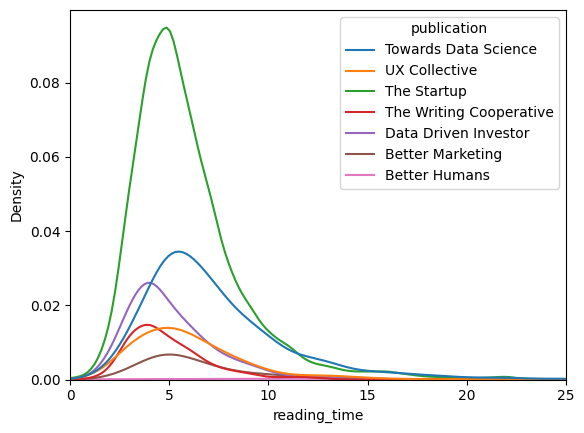

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x='reading_time',hue='publication',data=df)
plt.xlim(0,25)
plt.show()

In [9]:
import re
def fix_titles(row):
    if re.search("<\w.*?>", row) != None:
        df["title"] = df["title"].replace("<\w.*?>", "", regex=True)
        df["title"] = df["title"].replace("</\w.*?>", "", regex=True)
    return row

df['title'] = df['title'].apply(fix_titles)

In [10]:
df=df.drop(['id'],axis=1)

In [11]:
df

,url,title,subtitle,claps,responses,reading_time,publication,date
0,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,850,8,8,Towards Data Science,30/05/2019
1,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,1100,11,9,Towards Data Science,30/05/2019
2,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,767,1,5,Towards Data Science,30/05/2019
3,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,354,0,4,Towards Data Science,30/05/2019
4,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,211,3,4,Towards Data Science,30/05/2019
...,...,...,...,...,...,...,...,...
6503,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,661,6,6,Better Marketing,05/12/2019
6504,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,189,1,5,Better Marketing,05/12/2019
6505,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,207,1,8,Better Marketing,05/12/2019
6506,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,253,2,5,Better Marketing,05/12/2019


In [12]:
df["subtitle"].fillna(df["title"], inplace=True)
df["article"] = df["title"] + df["subtitle"]

In [13]:
df = df.sort_values(by="claps", ascending=False)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer()
articles=vectorizer.fit_transform(df["article"])

In [15]:
df

,url,title,subtitle,claps,responses,reading_time,publication,date,article
4552,https://medium.com/swlh/i-have-15-ideas-to-cha...,I Have 15 ideas To Change Your Life. Do you Ha...,I Have 15 ideas To Change Your Life. Do you Ha...,38000,170,5,The Startup,20/05/2019,I Have 15 ideas To Change Your Life. Do you Ha...
1281,https://medium.com/better-marketing/how-to-han...,How To Handle Other People’s Bad Moods Like a Pro,Step 1: Treat difficult emotions like a puzzle...,23000,74,7,Better Marketing,11/09/2019,How To Handle Other People’s Bad Moods Like a ...
1003,https://medium.com/swlh/if-you-learn-to-write-...,"<strong class=""markup--strong markup--h3-stron...",The secret is in the line.,20000,78,6,The Startup,14/10/2019,"<strong class=""markup--strong markup--h3-stron..."
3592,https://medium.com/swlh/how-to-break-a-negativ...,How To Break A Negative Thought Loop,“It’s pretty black-and-white. You either let g...,16400,58,4,The Startup,21/07/2019,How To Break A Negative Thought Loop“It’s pret...
5933,https://writingcooperative.com/10-things-to-do...,10 Things To Do When Medium Doesn’t Curate You...,"When I have a curation gap, I go into my…",12600,117,5,The Writing Cooperative,18/03/2019,10 Things To Do When Medium Doesn’t Curate You...
...,...,...,...,...,...,...,...,...,...
3352,https://medium.com/datadriveninvestor/the-bloc...,The Blockchain Care Act (BCA),The comprehensive decentralized health care re...,0,0,9,Data Driven Investor,25/03/2019,The Blockchain Care Act (BCA)The comprehensive...
1402,https://towardsdatascience.com/teaching-a-comp...,Teaching A Computer To Land On The Moon,Teaching A Computer To Land On The Moon,0,0,3,Towards Data Science,09/11/2019,Teaching A Computer To Land On The MoonTeachin...
3973,https://writingcooperative.com/find-best-fit-b...,Find Best-Fit Book Reviewers (and Deal with th...,Find Best-Fit Book Reviewers (and Deal with th...,0,0,4,The Writing Cooperative,24/05/2019,Find Best-Fit Book Reviewers (and Deal with th...
181,https://medium.com/datadriveninvestor/revisiti...,Revisiting FXI from 2007,"Woulda, coulda, shoulda",0,0,2,Data Driven Investor,30/05/2019,"Revisiting FXI from 2007Woulda, coulda, shoulda"


# Local average claps

In [34]:
df[(df['claps'] < 1000) & (df['claps'] > 500)].count()


url             463
title           463
subtitle        463
claps           463
responses       463
reading_time    463
publication     463
date            463
article         463
dtype: int64

In [36]:
df[(df['claps'] < 500) & (df['claps'] > 250)].count()


url             922
title           922
subtitle        922
claps           922
responses       922
reading_time    922
publication     922
date            922
article         922
dtype: int64

In [38]:
df[(df['claps'] < 250) & (df['claps'] > 100)].count()


url             1788
title           1788
subtitle        1788
claps           1788
responses       1788
reading_time    1788
publication     1788
date            1788
article         1788
dtype: int64

In [69]:
df[(df['claps'] < 100) & (df['claps'] >= 0)].count()


url              2913
title            2913
subtitle         2913
claps            2913
responses        2913
reading_time     2913
publication      2913
date             2913
article          2913
medium rating    2913
dtype: int64

<Axes: xlabel='claps', ylabel='Density'>

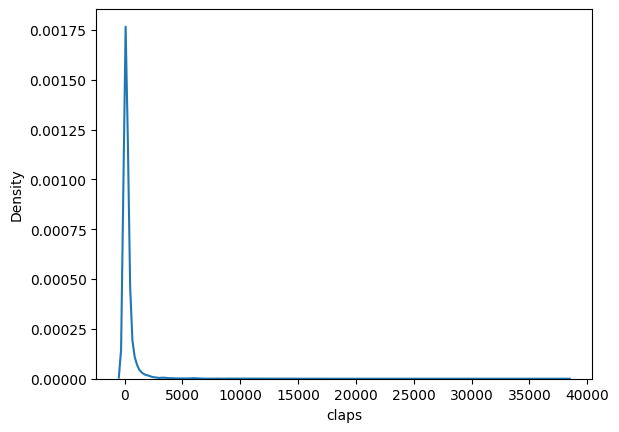

In [20]:
sns.kdeplot(df['claps'])

In [ ]:
avg_claps=df['claps'].sum()

In [ ]:
df.loc[(df['claps'] > 1000), 'medium rating'] = 5

df.loc[(df['claps'] <= 1000) & (df['claps'] > 500), 'medium rating'] = 4

df.loc[(df['claps'] <= 500) & (df['claps'] > 250), 'medium rating'] = 3

df.loc[(df['claps'] <= 250) & (df['claps'] > 100), 'medium rating'] = 2

df.loc[(df['claps'] <= 100) & (df['claps'] >= 0), 'medium rating'] = 1


<Axes: xlabel='responses', ylabel='Density'>

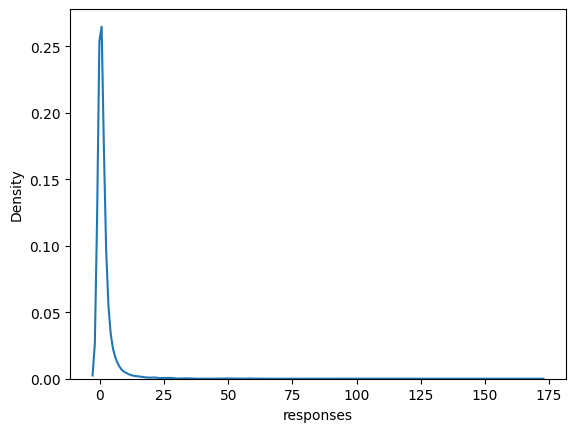

In [62]:
sns.kdeplot(df['responses'])

In [79]:
df.loc[(df['responses']>=50) ].count()

url                19
title              19
subtitle           19
claps              19
responses          19
reading_time       19
publication        19
date               19
article            19
medium rating      19
response_rating    19
dtype: int64

In [74]:
df[(df['responses']<3)].count()

url              5356
title            5356
subtitle         5356
claps            5356
responses        5356
reading_time     5356
publication      5356
date             5356
article          5356
medium rating    5356
dtype: int64

In [82]:
df.loc[(df['responses']>=50),'response_rating' ]=2
df.loc[(df['responses']>=3) & (df['responses']<50),'response_rating' ]=1
df.loc[(df['responses']<3),'response_rating' ]=0


In [91]:
df.drop(['subtitle','url','title'],axis=1)

,claps,responses,reading_time,publication,date,article,medium rating,response_rating
4552,38000,170,5,The Startup,20/05/2019,I Have 15 ideas To Change Your Life. Do you Ha...,5.0,2.0
1281,23000,74,7,Better Marketing,11/09/2019,How To Handle Other People’s Bad Moods Like a ...,5.0,2.0
1003,20000,78,6,The Startup,14/10/2019,"<strong class=""markup--strong markup--h3-stron...",5.0,2.0
3592,16400,58,4,The Startup,21/07/2019,How To Break A Negative Thought Loop“It’s pret...,5.0,2.0
5933,12600,117,5,The Writing Cooperative,18/03/2019,10 Things To Do When Medium Doesn’t Curate You...,5.0,2.0
...,...,...,...,...,...,...,...,...
3352,0,0,9,Data Driven Investor,25/03/2019,The Blockchain Care Act (BCA)The comprehensive...,1.0,0.0
1402,0,0,3,Towards Data Science,09/11/2019,Teaching A Computer To Land On The MoonTeachin...,1.0,0.0
3973,0,0,4,The Writing Cooperative,24/05/2019,Find Best-Fit Book Reviewers (and Deal with th...,1.0,0.0
181,0,0,2,Data Driven Investor,30/05/2019,"Revisiting FXI from 2007Woulda, coulda, shoulda",1.0,0.0


In [90]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
articles = vectorizer.fit_transform(df["article"])
articles



for pub in df['publication']:
  pub_sim=cosine_similarity(df['publication'],df).ravel()

ValueError: could not convert string to float: 'The Startup'